In [70]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import warnings

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/cvxpy/expressions/expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/cvxpy/expressions/expression

Problem Status: optimal
Weight : [0.02099638 0.16051571]
Gamma : 0.2373256584575933


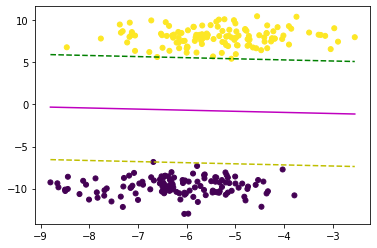

In [75]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

X, y = make_blobs(n_samples=250, centers=2, n_features=2)
m,n = np.shape(X)

plt.scatter(X[:,0], X[:, 1], marker='o', c=y, s=25)
y=np.where(y == 0, -1, y)

a = Variable(n)
b = Variable()
m,n = np.shape(X)
obj = Minimize((norm(a,2)))

constraints = [y[i]*(a.T * X[i] + b) >= 1  for i in range(m)]

prob = Problem(obj, constraints)

prob.solve()
print("Problem Status: %s"%prob.status)

if(prob.status=='optimal'):
    p = a.value
    q = b.value
    print("Weight :",p)
    print("Gamma :",q)

    x = np.linspace(np.min(X[:,0]),np.max(X[:,0]), 20)

    plt.plot(x, (-q - (p[0]*x))/p[1] , 'm')

    plt.plot(x, (-q - (p[0]*x)+1)/p[1] ,'g--')


    plt.plot(x, (-q - (p[0]*x)-1)/p[1] , 'y--')


    plt.show()